## Cocacola 

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing  
import warnings
warnings.filterwarnings("ignore") 

<AxesSubplot:>

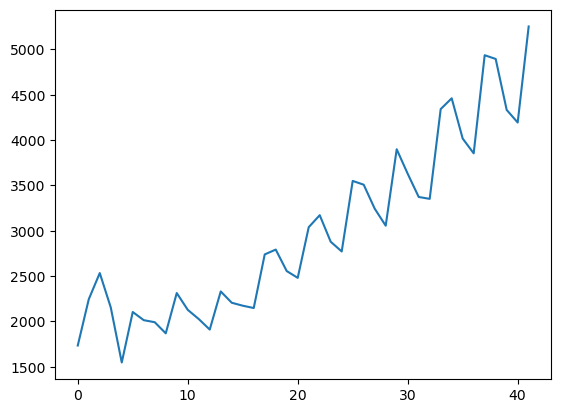

In [30]:
df = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
df.Sales.plot() 

# Splitting data

In [31]:
Train = df.head(110)
Test = df.tail(12) 

## Moving Average

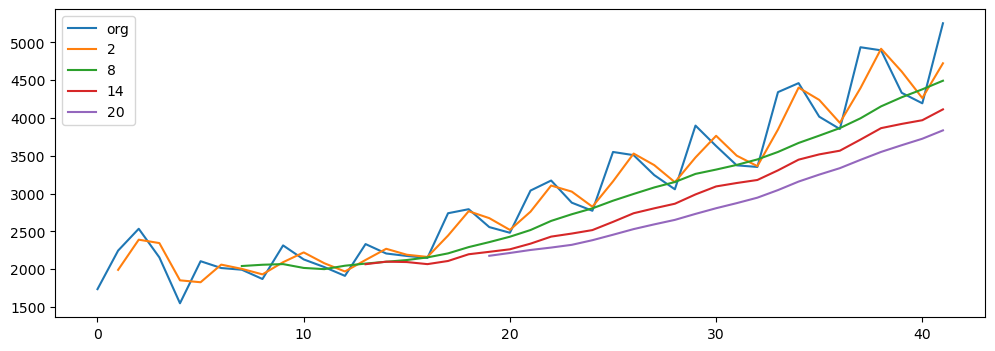

In [32]:
plt.figure(figsize=(12,4))
df.Sales.plot(label="org")
for i in range(2,24,6):
    df["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best') 

## Time series decomposition plot

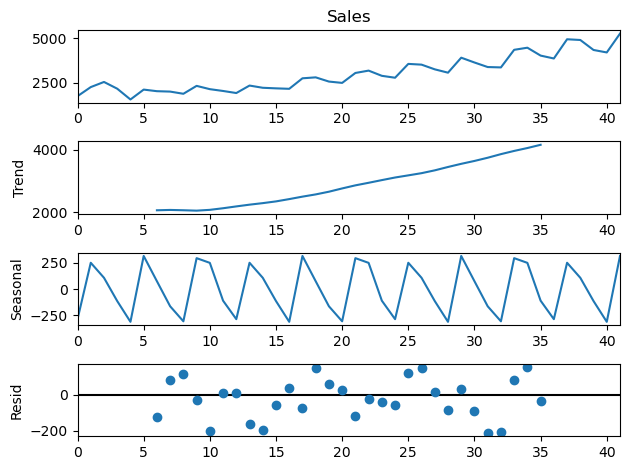

In [33]:
decompose_ts_add = seasonal_decompose(df.Sales,period=12)
decompose_ts_add.plot()
plt.show() 

## ACF plots and PACF plots

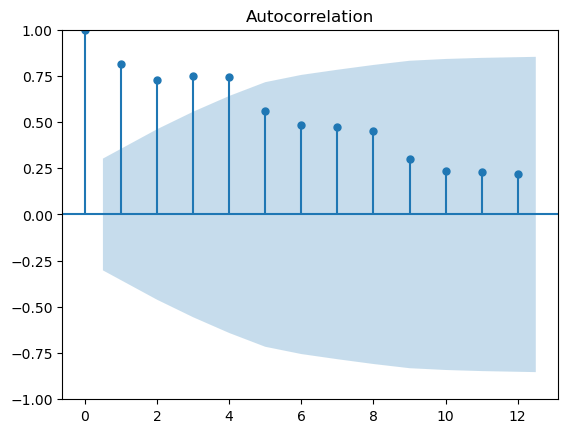

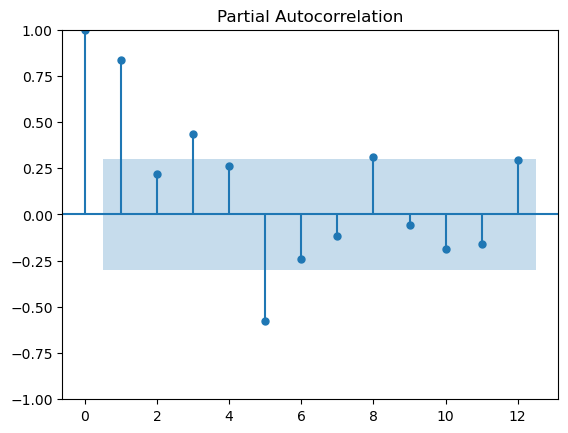

In [34]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Sales,lags=12)
tsa_plots.plot_pacf(df.Sales,lags=12)
plt.show() 

## Evaluation Metric MAPE

In [35]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)  

## Simple Exponential Method

In [36]:
Train["Sales"] = Train["Sales"].astype('double') 
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales)   

11.03905469738315

## Holt method

In [37]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

11.45438223525334

## Holts winter exponential smoothing with additive seasonality and additive trend

In [38]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)  

4.0133254183440865

## Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [39]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)  

1.6594666174029022

## Final Model by combining train and test

In [40]:
df["Sales"] = df["Sales"].astype('double')
hwe_model_mul_add = ExponentialSmoothing(df["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()

In [42]:
#Forecasting for next 10 time periods
hwe_model_mul_add.forecast(10)    

42    5012.344209
43    4653.573883
44    4512.618744
45    5673.548341
46    5715.159774
47    5161.415217
48    4909.552114
49    6205.541243
50    6166.703338
51    5529.963063
dtype: float64